# Deep learning from scratch: homework 2

### General instructions

Complete the exercises listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells.

#### <span style="color:#a50e3e;">Exercise 1. </span>   Perform two-class classification on a toy dataset

Code up the two-class logistic regression / softmax cost function, using gradient descent to minimize.  You should use the two class toy dataset we [we saw in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_3_logistic_regression.slides.html#/14/1) to test out your code.  This dataset is in the file called *3d_classification_data_v2.csv*.

Create a plot with two panels that shows the number of misclassifications at each gradient descent step (in the left panel), and one that compares the cost function at each gradient descent step (in the right panel).  You won't get perfect separation - but you should be able to separate most of the points.

In [1]:
# gradient descent function - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
import autograd.numpy as np 
import matplotlib.pyplot as plt
from autograd import grad
def gradient_descent(g,alpha,max_its,w):
    # compute the gradient of our input function - note this is a function too!
    gradient = grad(g)
    weight_history=[]
    # run the gradient descent loop
    best_w = w        # weight we return, should be the one providing lowest evaluation
    best_eval = g(w)       # lowest evaluation yet
    for k in range(max_its):
       # evaluate the gradient
        grad_eval = gradient(w)
        #print(w,alpha,grad_eval)
        # take gradient descent step
        w = w - alpha*grad_eval
        weight_history.append(w) 
    return weight_history

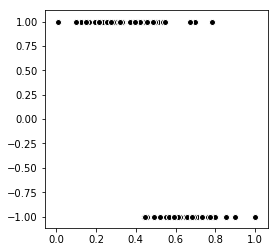

In [67]:
# data input
csvname = '3d_classification_data_v2.csv'
data = np.loadtxt(csvname,delimiter = ',')
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,-1],color = 'k',edgecolor = 'w')
plt.show()

In [100]:
# define the input and output of our dataset
x = data[:,0:2]
y = data[:,2]

# the convex softmax cost function - for N > 2
def softmax(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p,:]
        y_p = y[p]
        a_p = w[0] + sum([a*b for a,b in zip(w[1:],x_p)])
        cost += np.log(1 + np.exp(-y_p*a_p)) 
    return cost 

In [70]:
w = np.asarray([1.5,1.5,1.5])
weight_history = gradient_descent(g = softmax,alpha = 10**(-3),max_its = 500,w = w)

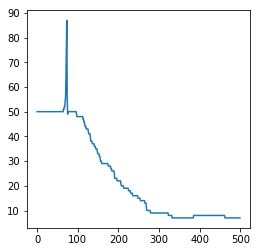

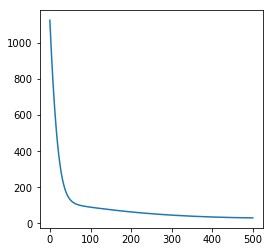

In [73]:
NUM=[]
COST=[]
for i in range(len(weight_history)):
    cost=0
    cost1=0
    num=0
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[i][0] + sum([a*b for a,b in zip(weight_history[i][1:],x_p)])
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
        else:
            predict_p=-1
        cost=(predict_p-y_p)**2+cost
    COST.append(cost1)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(4,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(4,4))
ax2.plot(COST)
plt.show(COST)

#### <span style="color:#a50e3e;">Exercise 2. </span>   Perform two-class classification on a breast cancer dataset

Use the softmax cost function to classify healthy from cancerous tissue using the dataset located in breast_cancer_dataset.csv (included in this homework folder).  You can examine the description of this dataset [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

There are $N = 8$ input dimensions to the input of this dataset (these are the first $N = 8$ columns of the breast_cancer_dataset.csv, the last column are the associated labels).  Fit using gradient descent using a maximum of 5,000 iterations.  You should be able to reach a point on the surface where you misclassify less than 30 examples.

In [35]:
#I tried 2 mathods, using forloop and not using forloop.
#using forloop takes me a whole night while not using forloop just takes
#me couple minutes.
# data input
csvname ='breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,0:-1]
y = data[:,-1]


In [227]:
w = np.ones((9,1))
weight_history_canser = gradient_descent(g = softmax,alpha = 10**(-4),max_its = 5000,w = w)

In [228]:
print(weight_history_canser)

[array([[ 0.97590038],
       [ 0.82660048],
       [ 0.84160039],
       [ 0.8419004 ],
       [ 0.8663004 ],
       [ 0.87230065],
       [ 0.85590054],
       [ 0.85870039],
       [ 0.93760038]]), array([[ 0.95180186],
       [ 0.65320248],
       [ 0.68320188],
       [ 0.68380193],
       [ 0.73260194],
       [ 0.74460318],
       [ 0.71180271],
       [ 0.71740188],
       [ 0.87520186]]), array([[ 0.92770774],
       [ 0.47981133],
       [ 0.52480788],
       [ 0.52570817],
       [ 0.59890815],
       [ 0.6169135 ],
       [ 0.56771179],
       [ 0.57610788],
       [ 0.81280776]]), array([[ 0.90363247],
       [ 0.30645376],
       [ 0.36643341],
       [ 0.36763501],
       [ 0.4652346 ],
       [ 0.48925791],
       [ 0.42365192],
       [ 0.43483325],
       [ 0.75043261]]), array([[ 0.87964397],
       [ 0.13327796],
       [ 0.20815076],
       [ 0.20966027],
       [ 0.33165622],
       [ 0.36176281],
       [ 0.27974249],
       [ 0.29364873],
       [ 0.68814472]]),

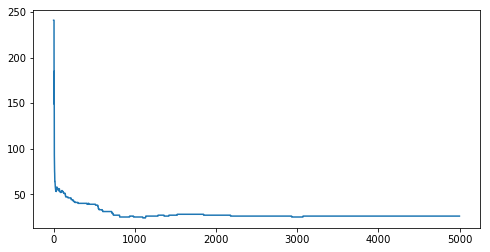

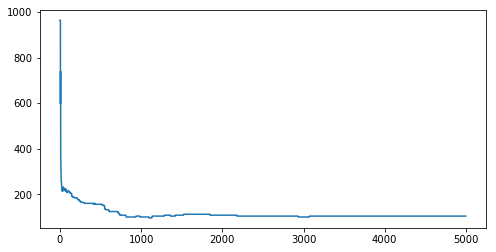

In [229]:
NUM=[]
COST=[]
for i in range(len(weight_history_canser)):
    cost=0
    num=0
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history_canser[i][0] + sum([a*b for a,b in zip(weight_history_canser[i][1:],x_p)])
        if(predict_p>=0):
            predict_p=1
        else:
            predict_p=-1
        cost=(predict_p-y_p)**2+cost
    COST.append(cost)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
ax2.plot(COST)
plt.show(COST)

In [230]:
print(NUM[-1])

26.0


In [74]:
# data input
csvname ='breast_cancer_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:,0:-1]
y = data[:,-1]
y.shape=(len(y),1)
#softmax funciotn
def softmax(w):
    a_p=w[0]+np.dot(x,w[1:])
    cost=sum(np.log(1+np.exp(-y*a_p)))
    return cost
w = np.ones((9,1))
weight_history = gradient_descent(g = softmax,alpha = 10**(-4),max_its = 5000,w = w)

In [75]:
print(weight_history)

[array([[ 0.97590038],
       [ 0.82660048],
       [ 0.84160039],
       [ 0.8419004 ],
       [ 0.8663004 ],
       [ 0.87230065],
       [ 0.85590054],
       [ 0.85870039],
       [ 0.93760038]]), array([[ 0.95180186],
       [ 0.65320248],
       [ 0.68320188],
       [ 0.68380193],
       [ 0.73260194],
       [ 0.74460318],
       [ 0.71180271],
       [ 0.71740188],
       [ 0.87520186]]), array([[ 0.92770774],
       [ 0.47981133],
       [ 0.52480788],
       [ 0.52570817],
       [ 0.59890815],
       [ 0.6169135 ],
       [ 0.56771179],
       [ 0.57610788],
       [ 0.81280776]]), array([[ 0.90363247],
       [ 0.30645376],
       [ 0.36643341],
       [ 0.36763501],
       [ 0.4652346 ],
       [ 0.48925791],
       [ 0.42365192],
       [ 0.43483325],
       [ 0.75043261]]), array([[ 0.87964397],
       [ 0.13327796],
       [ 0.20815076],
       [ 0.20966027],
       [ 0.33165622],
       [ 0.36176281],
       [ 0.27974249],
       [ 0.29364873],
       [ 0.68814472]]),

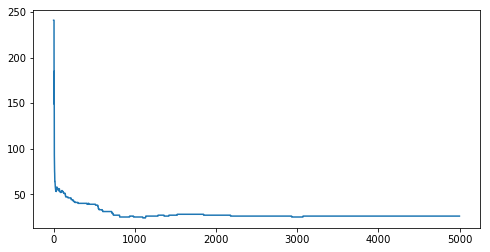

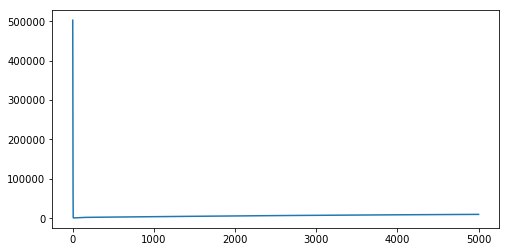

In [76]:
NUM=[]
COST=[]
for i in range(len(weight_history)):
    cost=0
    cost1=0
    num=0
    predict_p= weight_history[i][0]+np.dot(x,weight_history[i][1:])
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        cost1=(predict_p[p]-y_p)**2+cost1
        if(predict_p[p]>=0):
            predict_p[p]=1
        else:
            predict_p[p]=-1
        cost=(predict_p[p]-y_p)**2+cost
    COST.append(cost1)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
ax2.plot(COST)
plt.show(COST)

In [64]:
print(NUM[-1])

[ 26.]


#### <span style="color:#a50e3e;">Exercise 3. </span>   Code up One-versus-All multiclass classification

Using the toy $C = 3$ class dataset we saw [in class](https://jermwatt.github.io/mlrefined/presentations/courses/deep_learning/Lecture_5_one_versus_all.slides.html#/) - located in *3class_data.csv* - code up One-Versus-All classification, using this toy dataset to test out your code.  You should be able to learn a model that perfectly separates this data - as shown in class.  You may use your softmax cost / gradient descent code here for each of the two-class subproblems! 

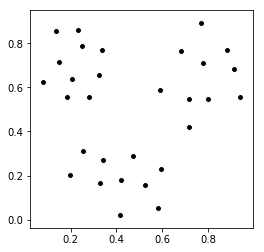

In [158]:
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()
mis_array1=[]
mis_array2=[]
mis_array3=[]


In [159]:
#softmax funciotn
def softmax(w):
    a_p=w[0]+np.dot(x,w[1:])
    cost=sum(np.log(1+np.exp(-y*a_p)))
    return cost

In [160]:
#the first classification
x = data[:,0:-1]
y = data[:,-1]

print(y)
predict_array=[]
for i in range(len(y)):
    if y[i]==1:
        y[i]=1
    else:
        y[i]=-1
w = np.asarray([1.5,1.5,1.5])
weight_history = gradient_descent(g = softmax,alpha = 10**(-3),max_its = 5000,w = w)
W=[]
W.append(weight_history[-1])

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]


In [161]:
print (len(y))

30


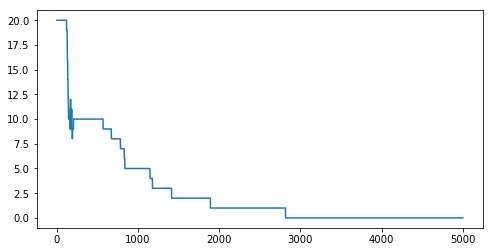

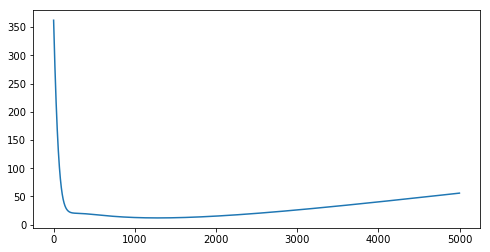

In [162]:
NUM=[]
COST=[]
for i in range(len(weight_history)):
    cost=0
    cost1=0
    num=0
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[i][0] + sum([a*b for a,b in zip(weight_history[i][1:],x_p)])
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
        else:
            predict_p=-1
        cost=(predict_p-y_p)**2+cost
    COST.append(cost1)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
ax2.plot(COST)
plt.show(COST)

In [163]:
for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[-1][0] + sum([a*b for a,b in zip(weight_history[-1][1:],x_p)])
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
            mis_array1.append(1)
        else:
            predict_p=-1
            mis_array1.append(-1)

In [164]:
print(NUM[-1])
print(mis_array1)

0.0
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


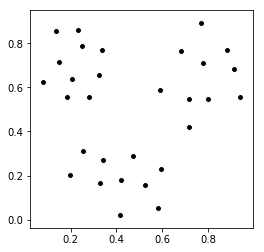

In [166]:
#the second classification
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()

In [167]:

x = data[:,0:-1]
y = data[:,-1]
predict_array=[]
for i in range(len(y)):
    if y[i]==2:
        y[i]=1
    else:
        y[i]=-1
w = np.asarray([1.5,1.5,1.5])
weight_history = gradient_descent(g = softmax,alpha = 10**(-3),max_its = 5000,w = w)
W.append(weight_history[-1])

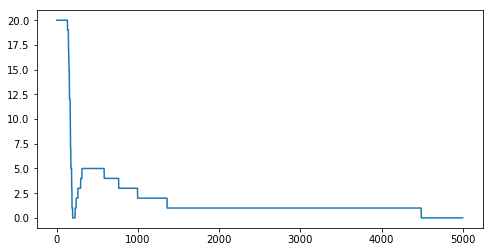

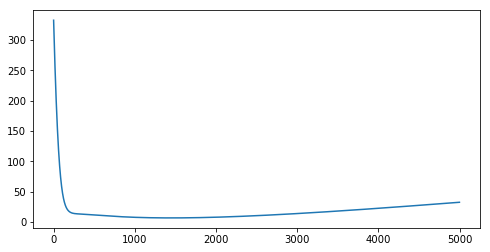

In [168]:
NUM=[]
COST=[]
for i in range(len(weight_history)):
    cost=0
    cost1=0
    num=0
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[i][0] + sum([a*b for a,b in zip(weight_history[i][1:],x_p)])
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
            
        else:
            predict_p=-1
            
        cost=(predict_p-y_p)**2+cost
    COST.append(cost1)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
ax2.plot(COST)
plt.show(COST)

In [169]:
for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[i][0] + sum([a*b for a,b in zip(weight_history[i][1:],x_p)])
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
            mis_array2.append(1)
        else:
            predict_p=-1
            mis_array2.append(-1)

In [170]:
print(NUM[-1])
print(mis_array2)

0.0
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]


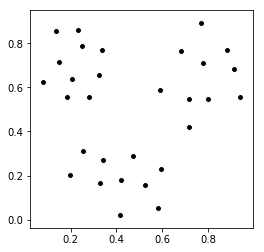

In [171]:
#the third classification
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()

In [172]:
#the third classification
x = data[:,0:-1]
y = data[:,-1]
print(y)
predict_array=[]
for i in range(len(y)):
    if y[i]==3:
        y[i]=1
    else:
        y[i]=-1
w = np.asarray([1.5,1.5,1.5])
weight_history = gradient_descent(g = softmax,alpha = 10**(-3),max_its = 5000,w = w)
W.append(weight_history[-1])
print(y)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


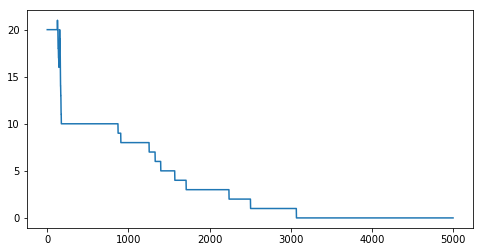

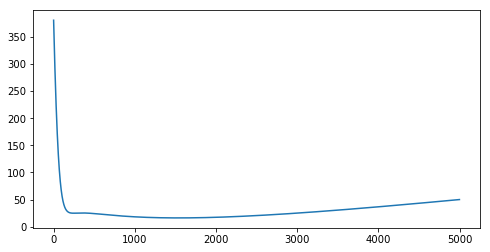

In [173]:
NUM=[]
COST=[]
for i in range(len(weight_history)):
    cost=0
    cost1=0
    num=0
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[i][0] + sum([a*b for a,b in zip(weight_history[i][1:],x_p)])
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
            
        else:
            predict_p=-1
            
        cost=(predict_p-y_p)**2+cost
    COST.append(cost1)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
ax2.plot(COST)
plt.show(COST)

In [174]:
for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[-1][0] + sum([a*b for a,b in zip(weight_history[-1][1:],x_p)])

        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
            mis_array3.append(1)
        else:
            predict_p=-1
            mis_array3.append(-1)

In [175]:
print(NUM[-1])
#mis_array3=[]
print(mis_array3)

0.0
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [184]:
#do statistics about 3 classes
#class 1 has [1,-1,-1]
#class 2 has [-1,1,-1]
#class 3 has [-1,-1,1]
label=np.ones(len(mis_array1))
for i in range(len(mis_array1)):
    if mis_array1[i]==1 and mis_array2[i]==-1 and mis_array3[i]==-1:
        label[i]=1
    if mis_array1[i]==-1 and mis_array2[i]==1 and mis_array3[i]==-1:
        label[i]=2
    if mis_array1[i]==-1 and mis_array2[i]==-1 and mis_array3[i]==1:
        label[i]=3
print(label)
print(mis_array1)
print(mis_array2)
print(mis_array3)

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2.  2.  2.  2.
  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [186]:
#count number of misclassification
csvname = '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
y=data[:,-1]
mis_num=0
for i in range(len(y)):
    if y[i]!=label[i]:
        mis_num+=mis_num
print(mis_num)
# we can see that the number of misclassification is zero
# which means I get a perfect result

0


#### <span style="color:#a50e3e;">Exercise 4. </span>   A nonlinear two-class dataset

Propose a nonlinear feature transformation and integrate it into your two-class classification scheme in order to adequately classify the dataset shown below - located in the file *bricks.csv'.  With the right transformation you should be able to classify this quite well.

<p>
  <img src= 'brick_pick.png' width="40%" height="40%" alt=""/>
</p>

In [240]:
import scipy.io as sio  
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


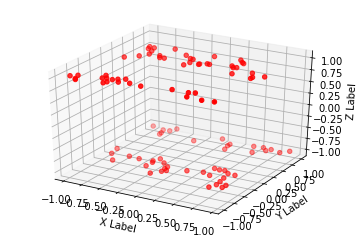

In [241]:
ax = plt.figure().add_subplot(111, projection = '3d')   
ax.scatter(data[:,0],data[:,1],data[:,2], c = 'r', marker = 'o') #点为红色三角形   
ax.set_xlabel('X Label')  
ax.set_ylabel('Y Label')  
ax.set_zlabel('Z Label')  
plt.show()

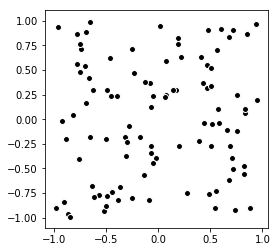

In [255]:
csvname = 'bricks.csv'
data = np.loadtxt(csvname,delimiter = ',')
fig, ax = plt.subplots(1, 1, figsize=(4,4))
ax.scatter(data[:,0],data[:,1],color = 'k',edgecolor = 'w')
plt.show()
x=data[:,0:-1]
y=data[:,-1]

In [243]:
w = np.asarray([2.5,2.5,2.5,2.5,2.5])
def softmax(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p,:]
        y_p = y[p]
        a_p = w[0]+w[1]*x_p[0]+w[2]*np.sin(w[3]+w[4]*x_p[1])
        cost += np.log(1 + np.exp(-y_p*a_p)) 
    return cost 

In [244]:
weight_history = gradient_descent(g = softmax,alpha = 10**(-4),max_its = 5000,w = w)

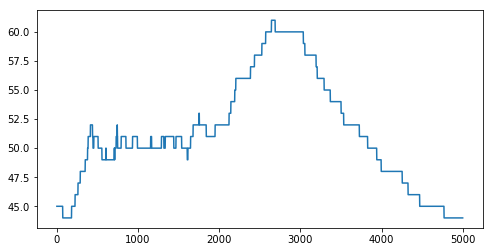

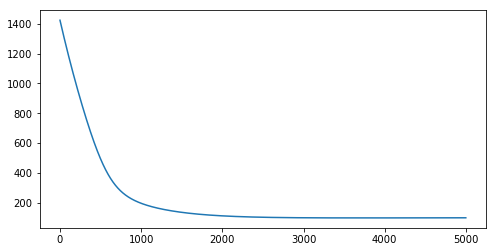

In [245]:
NUM=[]
COST=[]
for i in range(len(weight_history)):
    cost=0
    cost1=0
    num=0
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[i][0] + weight_history[i][1]*x_p[0]+weight_history[i][2]*np.sin(weight_history[i][3]+weight_history[i][4]*x_p[1])
        #print(predict_p)
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
            
        else:
            predict_p=-1
        
        cost=(predict_p-y_p)**2+cost
    COST.append(cost1)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
ax2.plot(COST)
plt.show(COST)

In [246]:
print(NUM[-1])
# I tried sin function
# the number of misclassification is more than 40
# it is a bad classification so I tried another method, the polynomial

44.0


In [262]:
x=data[:,0:-1]
y=data[:,-1]

w_init = np.asarray([0.01,1.5,0.01,-1.5])
def softmax(w):
    cost = 0
    for p in range(0,len(y)):
        x_p = x[p,:]
        y_p = y[p]
        a_p = w[0]+w[1]*x_p[1]+w[2]*x_p[1]**2+w[3]*x_p[1]**3
        cost += np.log(1 + np.exp(-y_p*a_p)) 
    return cost 

In [263]:
w_init = np.asarray([0.01,1.5,0.01,-1.5])
# I realize that the initial value of w is very important
weight_history = gradient_descent(g = softmax,alpha = 10**(-4),max_its = 5000,w = w_init)

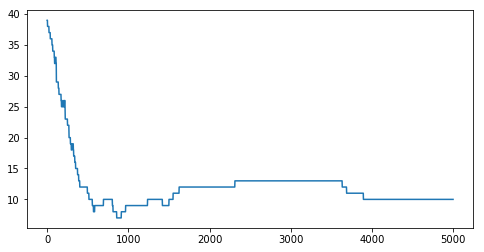

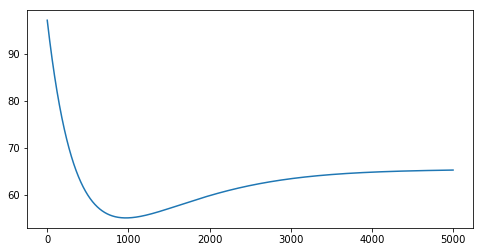

In [264]:
NUM=[]
COST=[]
for i in range(len(weight_history)):
    cost=0
    cost1=0
    num=0
    for p in range(len(x)):
        x_p = x[p,:]
        y_p = y[p]
        predict_p= weight_history[i][0] + weight_history[i][1]*x_p[1]+weight_history[i][2]*x_p[1]**2+weight_history[i][3]*x_p[1]**3
        #print(predict_p)
        cost1=(predict_p-y_p)**2+cost1
        if(predict_p>=0):
            predict_p=1
            
        else:
            predict_p=-1
        
        cost=(predict_p-y_p)**2+cost
    COST.append(cost1)
    num=cost/4
    NUM.append(num)
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(NUM)
plt.show(NUM)
fig, ax2 = plt.subplots(1, 1, figsize=(8,4))
ax2.plot(COST)
plt.show(COST)

In [265]:
print(NUM[-1])
# I tried polynomial function
# the number of misclassification is 10

10.0


In [266]:
print(min(NUM))
# the min misclassification number is 7

7.0
